In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/covid19ctscandlmulti/images/"
mask_dir = "./images/covid19ctscandlmulti/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 256
img_width      = 256
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-005
in_channels    = 3
out_channels   = 4
batch_size     = 5
loss_type      = 'CE'
model_type     = 'unet'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3060
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True,

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:04<00:00,  2.99it/s, loss=1.27]


Ave Loss: 1.3131121397018433
Ave Accuracy: 0.4548487345377604
Ave F1: 0.21388905975606448
Ave Precision: 0.355776948596453
Ave Recall: 0.45376908131028565
Ave Specificity: 0.45376908131028565
Saving model to test.pth...
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=1.19]


Ave Loss: 1.2034166966165816
Ave Accuracy: 0.6020884195963542
Ave F1: 0.27009745126781853
Ave Precision: 0.3704512648575879
Ave Recall: 0.5181125735460503
Ave Specificity: 0.5181125735460503
Saving model to test.pth...
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.76it/s, loss=1.13]


Ave Loss: 1.1328833954674857
Ave Accuracy: 0.6818440755208334
Ave F1: 0.30265161853915923
Ave Precision: 0.38057043569046456
Ave Recall: 0.5596167807890295
Ave Specificity: 0.5596167807890295
Saving model to test.pth...
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.92it/s, loss=1.08]


Ave Loss: 1.079819347177233
Ave Accuracy: 0.739940897623698
Ave F1: 0.3273560971802282
Ave Precision: 0.3887579755153755
Ave Recall: 0.5930850576722644
Ave Specificity: 0.5930850576722644
Saving model to test.pth...
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=1.04]


Ave Loss: 1.0353954136371613
Ave Accuracy: 0.7847910563151042
Ave F1: 0.3465950657465135
Ave Precision: 0.3946663720659804
Ave Recall: 0.6209508048456391
Ave Specificity: 0.6209508048456391
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.74it/s, loss=1]


Ave Loss: 0.9973989512239184
Ave Accuracy: 0.811925760904948
Ave F1: 0.360956334896952
Ave Precision: 0.4000403300376459
Ave Recall: 0.6424990141111573
Ave Specificity: 0.6424990141111573
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.968]


Ave Loss: 0.9644069288458142
Ave Accuracy: 0.8311594645182292
Ave F1: 0.37137690245158034
Ave Precision: 0.4044800903253224
Ave Recall: 0.6582538971898876
Ave Specificity: 0.6582538971898876
Saving model to test.pth...
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.939]


Ave Loss: 0.9352493371282306
Ave Accuracy: 0.8455968221028646
Ave F1: 0.37874713864119774
Ave Precision: 0.40817248347319557
Ave Recall: 0.6678912693977258
Ave Specificity: 0.6678912693977258
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.913]


Ave Loss: 0.909105658531189
Ave Accuracy: 0.8569966634114583
Ave F1: 0.3846088868228887
Ave Precision: 0.41101937733054833
Ave Recall: 0.6759986607995727
Ave Specificity: 0.6759986607995727
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.891]


Ave Loss: 0.8853085126195636
Ave Accuracy: 0.86600341796875
Ave F1: 0.38909981171268776
Ave Precision: 0.41313464131634725
Ave Recall: 0.6827121457563958
Ave Specificity: 0.6827121457563958
Saving model to test.pth...
Epoch: 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.92it/s, loss=0.87]


Ave Loss: 0.8636637202330998
Ave Accuracy: 0.8717575073242188
Ave F1: 0.3919893962989948
Ave Precision: 0.41508040706856286
Ave Recall: 0.6860737787328202
Ave Specificity: 0.6860737787328202
Saving model to test.pth...
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.848]


Ave Loss: 0.8434218295982906
Ave Accuracy: 0.8767476399739583
Ave F1: 0.3949421350985644
Ave Precision: 0.41764698478387924
Ave Recall: 0.690359100068717
Ave Specificity: 0.690359100068717
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.91it/s, loss=0.827]


Ave Loss: 0.8233893385955265
Ave Accuracy: 0.8805781046549479
Ave F1: 0.3964072745291354
Ave Precision: 0.41925629070653603
Ave Recall: 0.6926648526207069
Ave Specificity: 0.6926648526207069
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.809]


Ave Loss: 0.8038276221070971
Ave Accuracy: 0.8843292236328125
Ave F1: 0.39786257371746714
Ave Precision: 0.42104718409110276
Ave Recall: 0.6936114275083843
Ave Specificity: 0.6936114275083843
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.794]


Ave Loss: 0.7849717651094709
Ave Accuracy: 0.8893224080403646
Ave F1: 0.3991934358844172
Ave Precision: 0.4232222265497978
Ave Recall: 0.6924889790467429
Ave Specificity: 0.6924889790467429
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.787]


Ave Loss: 0.7703408513750348
Ave Accuracy: 0.8953501383463541
Ave F1: 0.40442012803840377
Ave Precision: 0.426859068880872
Ave Recall: 0.694587097693049
Ave Specificity: 0.694587097693049
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.767]


Ave Loss: 0.757011034658977
Ave Accuracy: 0.9030141194661458
Ave F1: 0.40777130582716004
Ave Precision: 0.4330556107645544
Ave Recall: 0.6986441345884387
Ave Specificity: 0.6986441345884387
Saving model to test.pth...
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.81it/s, loss=0.75]


Ave Loss: 0.7447998353413173
Ave Accuracy: 0.9026153564453125
Ave F1: 0.4079990326486062
Ave Precision: 0.43128278168286205
Ave Recall: 0.7014761335349646
Ave Specificity: 0.7014761335349646
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.735]


Ave Loss: 0.7268744579383305
Ave Accuracy: 0.9025263468424479
Ave F1: 0.40693478670660344
Ave Precision: 0.43208151762281183
Ave Recall: 0.7029944057602068
Ave Specificity: 0.7029944057602068
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.722]


Ave Loss: 0.7115911671093532
Ave Accuracy: 0.907465108235677
Ave F1: 0.40954352096752517
Ave Precision: 0.4341027809433985
Ave Recall: 0.7042675471140804
Ave Specificity: 0.7042675471140804
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.708]


Ave Loss: 0.6974243564265115
Ave Accuracy: 0.9099009195963542
Ave F1: 0.4101693966796016
Ave Precision: 0.43727138755775735
Ave Recall: 0.7038258503883758
Ave Specificity: 0.7038258503883758
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.697]


Ave Loss: 0.6864450105598995
Ave Accuracy: 0.9117355346679688
Ave F1: 0.4094467604040219
Ave Precision: 0.4367218898571584
Ave Recall: 0.7014284172142748
Ave Specificity: 0.7014284172142748
Saving model to test.pth...
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.687]


Ave Loss: 0.6763110629149846
Ave Accuracy: 0.9148656209309896
Ave F1: 0.4080006592226593
Ave Precision: 0.4368333436816787
Ave Recall: 0.6976628306975304
Ave Specificity: 0.6976628306975304
Saving model to test.pth...
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.678]


Ave Loss: 0.6687518698828561
Ave Accuracy: 0.9165537516276042
Ave F1: 0.4056579219683042
Ave Precision: 0.43464520407217344
Ave Recall: 0.695863368219485
Ave Specificity: 0.695863368219485
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.87it/s, loss=0.672]


Ave Loss: 0.6595883326871055
Ave Accuracy: 0.9166519165039062
Ave F1: 0.414660941626435
Ave Precision: 0.4397605362140519
Ave Recall: 0.7092237780328637
Ave Specificity: 0.7092237780328637
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.663]


Ave Loss: 0.651093989610672
Ave Accuracy: 0.9095026652018229
Ave F1: 0.4009257901484239
Ave Precision: 0.42549262790650855
Ave Recall: 0.695923098137498
Ave Specificity: 0.695923098137498
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.654]


Ave Loss: 0.6433320726667132
Ave Accuracy: 0.9178110758463541
Ave F1: 0.4145706865995804
Ave Precision: 0.4451150985362974
Ave Recall: 0.7092049231305695
Ave Specificity: 0.7092049231305695
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.646]


Ave Loss: 0.6345917199339185
Ave Accuracy: 0.9187494913736979
Ave F1: 0.4108677649144386
Ave Precision: 0.44310234109105107
Ave Recall: 0.7046841540586193
Ave Specificity: 0.7046841540586193
Saving model to test.pth...
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.92it/s, loss=0.633]


Ave Loss: 0.6251031458377838
Ave Accuracy: 0.9202397664388021
Ave F1: 0.41350181342450987
Ave Precision: 0.44472763999475207
Ave Recall: 0.7117553471968424
Ave Specificity: 0.7117553471968424
Saving model to test.pth...
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.627]


Ave Loss: 0.616847710950034
Ave Accuracy: 0.9225977579752604
Ave F1: 0.4175947202293805
Ave Precision: 0.44665572987594165
Ave Recall: 0.7190027568339379
Ave Specificity: 0.7190027568339379
Saving model to test.pth...
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.87it/s, loss=0.619]


Ave Loss: 0.6079284250736237
Ave Accuracy: 0.92191162109375
Ave F1: 0.4187729100739061
Ave Precision: 0.44517654533624934
Ave Recall: 0.7163379228654995
Ave Specificity: 0.7163379228654995
Saving model to test.pth...
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.83it/s, loss=0.61]


Ave Loss: 0.6004954959665026
Ave Accuracy: 0.9215677897135417
Ave F1: 0.42031208829527195
Ave Precision: 0.44406987326036984
Ave Recall: 0.7241236451279444
Ave Specificity: 0.7241236451279444
Saving model to test.pth...
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.604]


Ave Loss: 0.5942805281707219
Ave Accuracy: 0.9229904174804687
Ave F1: 0.4188307622283331
Ave Precision: 0.44585963222498326
Ave Recall: 0.7234644925653722
Ave Specificity: 0.7234644925653722
Saving model to test.pth...
Epoch: 33


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.6]


Ave Loss: 0.589473307132721
Ave Accuracy: 0.9220987955729166
Ave F1: 0.4015122602518331
Ave Precision: 0.43062327336202805
Ave Recall: 0.6928848738549
Ave Specificity: 0.6928848738549
Saving model to test.pth...
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.84it/s, loss=0.594]


Ave Loss: 0.5853947613920484
Ave Accuracy: 0.924688720703125
Ave F1: 0.41556192998505953
Ave Precision: 0.4474528672062609
Ave Recall: 0.7094233681444195
Ave Specificity: 0.7094233681444195
Saving model to test.pth...
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.586]


Ave Loss: 0.5798630331243787
Ave Accuracy: 0.9248087565104167
Ave F1: 0.41884194684340387
Ave Precision: 0.44992654536736354
Ave Recall: 0.715629017687355
Ave Specificity: 0.715629017687355
Saving model to test.pth...
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.586]


Ave Loss: 0.5751744423593793
Ave Accuracy: 0.9206690470377604
Ave F1: 0.41389887486960864
Ave Precision: 0.4357747931892046
Ave Recall: 0.7201828904135499
Ave Specificity: 0.7201828904135499
Saving model to test.pth...
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.92it/s, loss=0.581]


Ave Loss: 0.570908567735127
Ave Accuracy: 0.9214635213216146
Ave F1: 0.42266953185819034
Ave Precision: 0.4450767624828445
Ave Recall: 0.7291984638949448
Ave Specificity: 0.7291984638949448
Saving model to test.pth...
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.86it/s, loss=0.572]


Ave Loss: 0.5654255066599164
Ave Accuracy: 0.9240915934244792
Ave F1: 0.4152550204598023
Ave Precision: 0.4456309038198741
Ave Recall: 0.7122035033434023
Ave Specificity: 0.7122035033434023
Saving model to test.pth...
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.568]


Ave Loss: 0.5596946861062732
Ave Accuracy: 0.9234268188476562
Ave F1: 0.4138643480885181
Ave Precision: 0.4423189393134698
Ave Recall: 0.7115089433616014
Ave Specificity: 0.7115089433616014
Saving model to test.pth...
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.91it/s, loss=0.563]


Ave Loss: 0.5546635346753257
Ave Accuracy: 0.9254302978515625
Ave F1: 0.4277845665071416
Ave Precision: 0.44733823963861336
Ave Recall: 0.734228066746274
Ave Specificity: 0.734228066746274
Saving model to test.pth...
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.556]


Ave Loss: 0.5496034409318652
Ave Accuracy: 0.9237497965494792
Ave F1: 0.42462322434813515
Ave Precision: 0.44135085276798003
Ave Recall: 0.7373158465572719
Ave Specificity: 0.7373158465572719
Saving model to test.pth...
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.553]


Ave Loss: 0.545179294688361
Ave Accuracy: 0.9229736328125
Ave F1: 0.4146111860351807
Ave Precision: 0.44005518143550104
Ave Recall: 0.7150748968425623
Ave Specificity: 0.7150748968425623
Saving model to test.pth...
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.91it/s, loss=0.546]


Ave Loss: 0.5405719067369189
Ave Accuracy: 0.9248881022135417
Ave F1: 0.4157142716670429
Ave Precision: 0.4458800151005479
Ave Recall: 0.7121306460861202
Ave Specificity: 0.7121306460861202
Saving model to test.pth...
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.544]


Ave Loss: 0.5358798291002002
Ave Accuracy: 0.9261739095052083
Ave F1: 0.42232572205928076
Ave Precision: 0.44375524442539793
Ave Recall: 0.7284941170846225
Ave Specificity: 0.7284941170846225
Saving model to test.pth...
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.537]


Ave Loss: 0.5314130570207324
Ave Accuracy: 0.9255284627278646
Ave F1: 0.42376842918431307
Ave Precision: 0.44309865919826763
Ave Recall: 0.7310405975095935
Ave Specificity: 0.7310405975095935
Saving model to test.pth...
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.534]


Ave Loss: 0.5273334511688778
Ave Accuracy: 0.9249720255533854
Ave F1: 0.4154333512755467
Ave Precision: 0.4415473078863823
Ave Recall: 0.714642597831258
Ave Specificity: 0.714642597831258
Saving model to test.pth...
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.91it/s, loss=0.529]


Ave Loss: 0.5234333255461284
Ave Accuracy: 0.9245325724283854
Ave F1: 0.41783570112124174
Ave Precision: 0.44093656316552043
Ave Recall: 0.7205889872885198
Ave Specificity: 0.7205889872885198
Saving model to test.pth...
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.90it/s, loss=0.525]


Ave Loss: 0.5191955289670399
Ave Accuracy: 0.923107401529948
Ave F1: 0.42241452624288967
Ave Precision: 0.4404174443940207
Ave Recall: 0.7306495924692928
Ave Specificity: 0.7306495924692928
Saving model to test.pth...
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.91it/s, loss=0.52]


Ave Loss: 0.51554494031838
Ave Accuracy: 0.9244674682617188
Ave F1: 0.42211581521152247
Ave Precision: 0.4421692054791173
Ave Recall: 0.7293650882810349
Ave Specificity: 0.7293650882810349
Saving model to test.pth...
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.518]


Ave Loss: 0.5120490917137691
Ave Accuracy: 0.927374267578125
Ave F1: 0.4155558237318807
Ave Precision: 0.44206227658457986
Ave Recall: 0.7121262303343265
Ave Specificity: 0.7121262303343265
Saving model to test.pth...
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.88it/s, loss=0.515]


Ave Loss: 0.5090332095112119
Ave Accuracy: 0.9255727132161459
Ave F1: 0.4170316935261901
Ave Precision: 0.4425690350421083
Ave Recall: 0.7144092969994514
Ave Specificity: 0.7144092969994514
Saving model to test.pth...
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.509]


Ave Loss: 0.505831418292863
Ave Accuracy: 0.9270680745442709
Ave F1: 0.4206288039279871
Ave Precision: 0.44403001144222176
Ave Recall: 0.7232621283148508
Ave Specificity: 0.7232621283148508
Saving model to test.pth...
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.509]


Ave Loss: 0.5022988042661122
Ave Accuracy: 0.923162333170573
Ave F1: 0.41594650780990894
Ave Precision: 0.4345916258721292
Ave Recall: 0.721619676445724
Ave Specificity: 0.721619676445724
Saving model to test.pth...
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.80it/s, loss=0.502]


Ave Loss: 0.49873365461826324
Ave Accuracy: 0.9208953857421875
Ave F1: 0.4214066756658152
Ave Precision: 0.43947610762343203
Ave Recall: 0.7304374949458871
Ave Specificity: 0.7304374949458871
Saving model to test.pth...
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.84it/s, loss=0.499]


Ave Loss: 0.4949339968817575
Ave Accuracy: 0.9279251098632812
Ave F1: 0.41989897186081304
Ave Precision: 0.44536980987768643
Ave Recall: 0.7183256708008187
Ave Specificity: 0.7183256708008187
Saving model to test.pth...
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.498]


Ave Loss: 0.4920072683266231
Ave Accuracy: 0.9265248616536458
Ave F1: 0.4138627259410621
Ave Precision: 0.43820330359500853
Ave Recall: 0.7065128319171881
Ave Specificity: 0.7065128319171881
Saving model to test.pth...
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.493]


Ave Loss: 0.4889982385294778
Ave Accuracy: 0.9262227376302083
Ave F1: 0.42671631444155433
Ave Precision: 0.44360683473066514
Ave Recall: 0.7367992137864519
Ave Specificity: 0.7367992137864519
Saving model to test.pth...
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.03it/s, loss=0.488]


Ave Loss: 0.4848387603248869
Ave Accuracy: 0.9244883219401042
Ave F1: 0.42462216456468993
Ave Precision: 0.4449340429039877
Ave Recall: 0.7283950282586145
Ave Specificity: 0.7283950282586145
Saving model to test.pth...
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.484]


Ave Loss: 0.48033391152109417
Ave Accuracy: 0.9268010457356771
Ave F1: 0.420316493384788
Ave Precision: 0.4406810872598141
Ave Recall: 0.7235702394073982
Ave Specificity: 0.7235702394073982
Saving model to test.pth...
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.48]


Ave Loss: 0.47629987980638233
Ave Accuracy: 0.9281453450520833
Ave F1: 0.4229777824458217
Ave Precision: 0.4470408443955256
Ave Recall: 0.7230104920758434
Ave Specificity: 0.7230104920758434
Saving model to test.pth...
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  4.25it/s, loss=0.477]


Ave Loss: 0.4728151261806488
Ave Accuracy: 0.9263331095377604
Ave F1: 0.4235673524911039
Ave Precision: 0.4461617054525743
Ave Recall: 0.7259332552852232
Ave Specificity: 0.7259332552852232
Saving model to test.pth...
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.73it/s, loss=0.474]


Ave Loss: 0.46973960953099386
Ave Accuracy: 0.9255640665690105
Ave F1: 0.424986245128839
Ave Precision: 0.4432915944662538
Ave Recall: 0.732520105755931
Ave Specificity: 0.732520105755931
Saving model to test.pth...
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.471]


Ave Loss: 0.4666588881186077
Ave Accuracy: 0.9263575236002605
Ave F1: 0.4210127354618989
Ave Precision: 0.44147177793870074
Ave Recall: 0.7249131310047467
Ave Specificity: 0.7249131310047467
Saving model to test.pth...
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.03it/s, loss=0.468]


Ave Loss: 0.46427788053240093
Ave Accuracy: 0.9269994099934896
Ave F1: 0.4191261109650984
Ave Precision: 0.4426945350205546
Ave Recall: 0.7177463213476333
Ave Specificity: 0.7177463213476333
Saving model to test.pth...
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.465]


Ave Loss: 0.4613786041736603
Ave Accuracy: 0.9275802612304688
Ave F1: 0.4245313201581426
Ave Precision: 0.4487669567381775
Ave Recall: 0.7233342485227416
Ave Specificity: 0.7233342485227416
Saving model to test.pth...
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.77it/s, loss=0.463]


Ave Loss: 0.45923188967364176
Ave Accuracy: 0.9265263875325521
Ave F1: 0.4275089342718227
Ave Precision: 0.44859080930235706
Ave Recall: 0.7321600435813828
Ave Specificity: 0.7321600435813828
Saving model to test.pth...
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.93it/s, loss=0.459]


Ave Loss: 0.45622045014585766
Ave Accuracy: 0.9256759643554687
Ave F1: 0.41968276709909136
Ave Precision: 0.4395567171016564
Ave Recall: 0.725413072340957
Ave Specificity: 0.725413072340957
Saving model to test.pth...
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.89it/s, loss=0.457]


Ave Loss: 0.4540867528745106
Ave Accuracy: 0.9289026896158854
Ave F1: 0.425068638530767
Ave Precision: 0.451689510662456
Ave Recall: 0.7232670012202467
Ave Specificity: 0.7232670012202467
Saving model to test.pth...
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.06it/s, loss=0.454]


Ave Loss: 0.4507921827690942
Ave Accuracy: 0.9271230061848958
Ave F1: 0.42338452696157575
Ave Precision: 0.4490180102748953
Ave Recall: 0.7223544633216075
Ave Specificity: 0.7223544633216075
Saving model to test.pth...
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.451]


Ave Loss: 0.4481302286897387
Ave Accuracy: 0.9239791870117188
Ave F1: 0.4219441434101875
Ave Precision: 0.4397286796219241
Ave Recall: 0.7303438136539546
Ave Specificity: 0.7303438136539546
Saving model to test.pth...
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.449]


Ave Loss: 0.4454449053321566
Ave Accuracy: 0.927539571126302
Ave F1: 0.42178539505669393
Ave Precision: 0.44856046918379955
Ave Recall: 0.7221423021928656
Ave Specificity: 0.7221423021928656
Saving model to test.pth...
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.09it/s, loss=0.445]


Ave Loss: 0.4424160144158772
Ave Accuracy: 0.9289148966471354
Ave F1: 0.42374196615726056
Ave Precision: 0.4528998591350345
Ave Recall: 0.7202829765062317
Ave Specificity: 0.7202829765062317
Saving model to test.pth...
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.04it/s, loss=0.442]


Ave Loss: 0.43928820746285574
Ave Accuracy: 0.9268356323242187
Ave F1: 0.4218200330477398
Ave Precision: 0.44280104482155463
Ave Recall: 0.7243986448025804
Ave Specificity: 0.7243986448025804
Saving model to test.pth...
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.44]


Ave Loss: 0.4368017188140324
Ave Accuracy: 0.9248057047526042
Ave F1: 0.42502733818204086
Ave Precision: 0.44275379812298693
Ave Recall: 0.7333834954720964
Ave Specificity: 0.7333834954720964
Saving model to test.pth...
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.438]


Ave Loss: 0.43435647657939364
Ave Accuracy: 0.9261337280273437
Ave F1: 0.42411307160982215
Ave Precision: 0.44585439910428987
Ave Recall: 0.7297170079602183
Ave Specificity: 0.7297170079602183
Saving model to test.pth...
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.435]


Ave Loss: 0.43167029321193695
Ave Accuracy: 0.9291453043619792
Ave F1: 0.4236511651344164
Ave Precision: 0.4514324899247343
Ave Recall: 0.7198951963270263
Ave Specificity: 0.7198951963270263
Saving model to test.pth...
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.433]


Ave Loss: 0.42942592075892855
Ave Accuracy: 0.9285858154296875
Ave F1: 0.42043691291732915
Ave Precision: 0.4445958481147375
Ave Recall: 0.717012504965973
Ave Specificity: 0.717012504965973
Saving model to test.pth...
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.87it/s, loss=0.43]


Ave Loss: 0.42659968989236013
Ave Accuracy: 0.923656717936198
Ave F1: 0.4235977249318387
Ave Precision: 0.4413710544664834
Ave Recall: 0.7332822107487453
Ave Specificity: 0.7332822107487453
Saving model to test.pth...
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.428]


Ave Loss: 0.4245487536702837
Ave Accuracy: 0.926287841796875
Ave F1: 0.42780282055438673
Ave Precision: 0.4488371571359016
Ave Recall: 0.735219031718431
Ave Specificity: 0.735219031718431
Saving model to test.pth...
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.424]


Ave Loss: 0.42117105637277874
Ave Accuracy: 0.9288553873697917
Ave F1: 0.4200426328656395
Ave Precision: 0.44660473133119477
Ave Recall: 0.7173032942548334
Ave Specificity: 0.7173032942548334
Saving model to test.pth...
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.421]


Ave Loss: 0.41813995795590536
Ave Accuracy: 0.9278228759765625
Ave F1: 0.4265119173097851
Ave Precision: 0.4508360169608799
Ave Recall: 0.7288818841760673
Ave Specificity: 0.7288818841760673
Saving model to test.pth...
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.419]


Ave Loss: 0.41536144060747965
Ave Accuracy: 0.9257120768229167
Ave F1: 0.4227850524881473
Ave Precision: 0.44311607588267693
Ave Recall: 0.7302294604923699
Ave Specificity: 0.7302294604923699
Saving model to test.pth...
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.416]


Ave Loss: 0.4133605126823698
Ave Accuracy: 0.9281016031901042
Ave F1: 0.42064029811155373
Ave Precision: 0.4434423468898732
Ave Recall: 0.720281449203441
Ave Specificity: 0.720281449203441
Saving model to test.pth...
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.415]


Ave Loss: 0.41100358963012695
Ave Accuracy: 0.9289037068684896
Ave F1: 0.42515778140804145
Ave Precision: 0.4524328060469289
Ave Recall: 0.7196774879901293
Ave Specificity: 0.7196774879901293
Saving model to test.pth...
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.08it/s, loss=0.412]


Ave Loss: 0.40894681215286255
Ave Accuracy: 0.9274266560872396
Ave F1: 0.4243389452358806
Ave Precision: 0.4441465227572515
Ave Recall: 0.7293258139273011
Ave Specificity: 0.7293258139273011
Saving model to test.pth...
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.05it/s, loss=0.41]


Ave Loss: 0.40660225067819866
Ave Accuracy: 0.9261927286783854
Ave F1: 0.4244732955352297
Ave Precision: 0.4419489320630777
Ave Recall: 0.733109709272211
Ave Specificity: 0.733109709272211
Saving model to test.pth...
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.408]


Ave Loss: 0.4044473447969982
Ave Accuracy: 0.9270777384440104
Ave F1: 0.4256259436214991
Ave Precision: 0.4470980323956695
Ave Recall: 0.7280378521596591
Ave Specificity: 0.7280378521596591
Saving model to test.pth...
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.01it/s, loss=0.405]


Ave Loss: 0.401893607207707
Ave Accuracy: 0.9287022908528646
Ave F1: 0.4233530220347614
Ave Precision: 0.44623636724171534
Ave Recall: 0.7239990818466016
Ave Specificity: 0.7239990818466016
Saving model to test.pth...
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.08it/s, loss=0.403]


Ave Loss: 0.39939681547028677
Ave Accuracy: 0.9267791748046875
Ave F1: 0.4207573671528689
Ave Precision: 0.44258620653499714
Ave Recall: 0.7243862352812993
Ave Specificity: 0.7243862352812993
Saving model to test.pth...
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.03it/s, loss=0.401]


Ave Loss: 0.39729720992701395
Ave Accuracy: 0.9287150065104167
Ave F1: 0.42449481341479145
Ave Precision: 0.45178128768431963
Ave Recall: 0.7215834518042168
Ave Specificity: 0.7215834518042168
Saving model to test.pth...
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.03it/s, loss=0.399]


Ave Loss: 0.3952478702579226
Ave Accuracy: 0.930743408203125
Ave F1: 0.4232168062999901
Ave Precision: 0.4489081392333416
Ave Recall: 0.7157626822202144
Ave Specificity: 0.7157626822202144
Saving model to test.pth...
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.07it/s, loss=0.396]


Ave Loss: 0.3932314472539084
Ave Accuracy: 0.9277125040690104
Ave F1: 0.4215530390538442
Ave Precision: 0.4414275311182074
Ave Recall: 0.7267332555468424
Ave Specificity: 0.7267332555468424
Saving model to test.pth...
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.85it/s, loss=0.396]


Ave Loss: 0.3912136128970555
Ave Accuracy: 0.9249282836914062
Ave F1: 0.4287104273987786
Ave Precision: 0.44259171835891203
Ave Recall: 0.7415415214731268
Ave Specificity: 0.7415415214731268
Saving model to test.pth...
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.03it/s, loss=0.393]


Ave Loss: 0.3897157928773335
Ave Accuracy: 0.9265869140625
Ave F1: 0.4246019242006541
Ave Precision: 0.4442483851668568
Ave Recall: 0.7319212763211368
Ave Specificity: 0.7319212763211368
Saving model to test.pth...
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.10it/s, loss=0.391]


Ave Loss: 0.38794862159660887
Ave Accuracy: 0.9297007242838542
Ave F1: 0.4174320321841257
Ave Precision: 0.4500346391996447
Ave Recall: 0.710496749810913
Ave Specificity: 0.710496749810913
Saving model to test.pth...
Epoch: 96


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  5.09it/s, loss=0.39]


Ave Loss: 0.38582469735826763
Ave Accuracy: 0.927777099609375
Ave F1: 0.42281074044651107
Ave Precision: 0.4471643061826308
Ave Recall: 0.7233167300935641
Ave Specificity: 0.7233167300935641
Saving model to test.pth...
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.78it/s, loss=0.387]


Ave Loss: 0.38372142400060383
Ave Accuracy: 0.9265869140625
Ave F1: 0.4218445812466901
Ave Precision: 0.4393455050984406
Ave Recall: 0.7286052092298437
Ave Specificity: 0.7286052092298437
Saving model to test.pth...
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.76it/s, loss=0.384]


Ave Loss: 0.3813799853835787
Ave Accuracy: 0.9285573323567708
Ave F1: 0.4236836980841291
Ave Precision: 0.4497946865261909
Ave Recall: 0.7238090172242589
Ave Specificity: 0.7238090172242589
Saving model to test.pth...
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.87it/s, loss=0.383]


Ave Loss: 0.3790010277714048
Ave Accuracy: 0.9282363891601563
Ave F1: 0.426876106419826
Ave Precision: 0.44521437352061943
Ave Recall: 0.7340837214594267
Ave Specificity: 0.7340837214594267
Saving model to test.pth...
Number of Parameters: 31037828


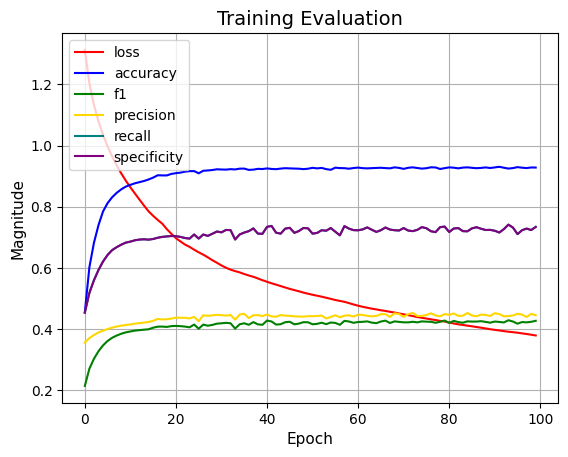

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

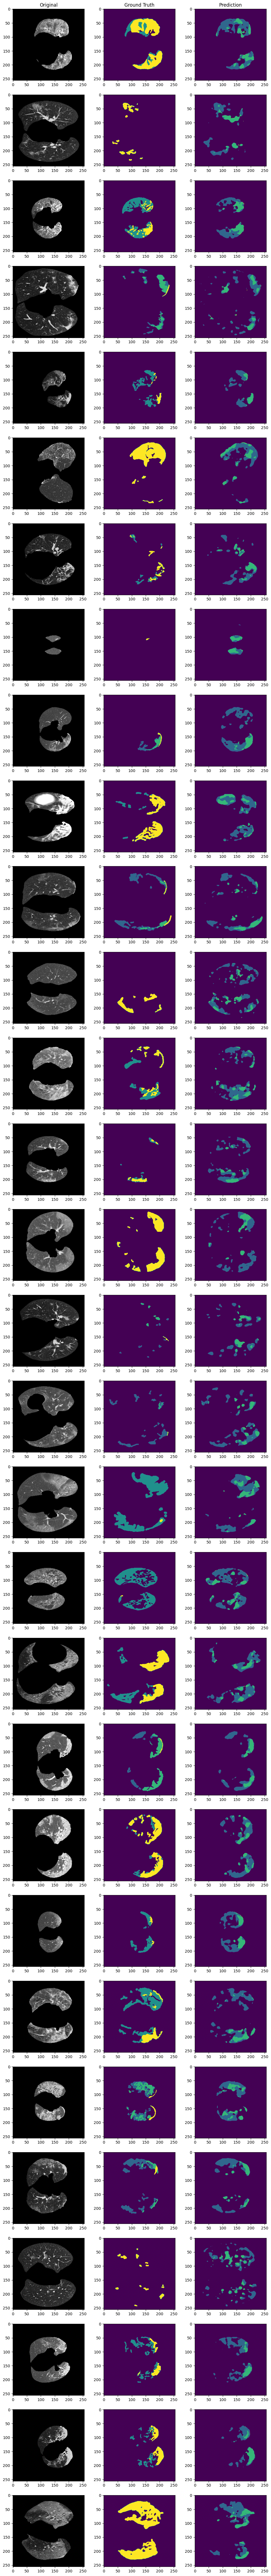

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
0,./tmp/test/images/i001.png,./tmp/test/masks/i001.tiff,0.325387,0.391001,0.892838,0.471999,0.650276,0.650276,0.951210,0.121094,...,0.245589,1.000000,0.990986,0.364527,0.245589,1.000000,0.281318,0.690321,0.277442,0.006329
1,./tmp/test/images/i005.png,./tmp/test/masks/i005.tiff,0.347639,0.396559,0.950012,0.370406,0.945220,0.945220,0.949475,0.441081,...,1.000000,1.000000,0.953145,0.827734,1.000000,1.000000,0.064711,0.354991,0.009170,0.000000
2,./tmp/test/images/i010.png,./tmp/test/masks/i010.tiff,0.453170,0.543604,0.945236,0.581106,0.774889,0.774889,0.959801,0.451774,...,0.600945,1.000000,0.994287,0.504326,0.600945,1.000000,0.297954,0.448977,0.346803,0.004604
3,./tmp/test/images/i011.png,./tmp/test/masks/i011.tiff,0.360495,0.438148,0.936935,0.444191,0.470929,0.470929,0.956435,0.172968,...,0.403590,0.006250,0.967729,0.506146,0.403590,0.006250,0.130806,0.530993,0.300451,0.002330
4,./tmp/test/images/i013.png,./tmp/test/masks/i013.tiff,0.491743,0.578225,0.972626,0.560271,0.868800,0.868800,0.974507,0.522212,...,0.849174,1.000000,0.987247,0.638780,0.849174,1.000000,0.238992,0.446552,0.268798,0.001084
5,./tmp/test/images/i016.png,./tmp/test/masks/i016.tiff,0.297182,0.340234,0.907730,0.463597,0.807546,0.807546,0.948535,0.000000,...,0.247566,1.000000,0.982619,1.000000,0.247566,1.000000,0.404804,0.551031,0.316379,0.005742
6,./tmp/test/images/i019.png,./tmp/test/masks/i019.tiff,0.380289,0.464082,0.952774,0.414312,0.850307,0.850307,0.956401,0.248483,...,0.602051,1.000000,0.959612,0.839566,0.602051,1.000000,0.072989,0.301878,0.280383,0.001181
7,./tmp/test/images/i023.png,./tmp/test/masks/i023.tiff,0.256424,0.271134,0.974472,0.262821,0.988715,0.988715,0.974467,0.000000,...,0.980392,1.000000,0.974467,1.000000,0.980392,1.000000,0.000000,0.001414,0.070721,0.000000
8,./tmp/test/images/i027.png,./tmp/test/masks/i027.tiff,0.363393,0.433980,0.923615,0.435631,0.612679,0.612679,0.928431,0.084586,...,0.910873,0.005405,0.929851,0.604585,0.910873,0.005405,0.037643,0.112929,0.356753,0.000642
9,./tmp/test/images/i031.png,./tmp/test/masks/i031.tiff,0.254790,0.288335,0.869247,0.329664,0.524739,0.524739,0.907598,0.002820,...,0.135099,1.000000,0.945777,0.018079,0.135099,1.000000,0.413169,0.566347,0.139688,0.003197


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.359919,0.426886,0.928234,0.445220,0.734107,0.734107,0.943754,0.266910,0.225763,0.003251,...,0.649474,0.737074,0.965536,0.584343,0.649474,0.737074,0.199273,0.404061,0.238828,0.002638
std,0.064902,0.082945,0.028060,0.091436,0.143017,0.143017,0.021983,0.167551,0.174301,0.008595,...,0.280182,0.443536,0.020723,0.203663,0.280182,0.443536,0.142979,0.171553,0.109953,0.002030
min,0.254790,0.271134,0.869247,0.262821,0.470929,0.470929,0.886598,0.000000,0.000000,0.000000,...,0.135099,0.000000,0.921907,0.018079,0.135099,0.000000,0.000000,0.001414,0.009170,0.000000
25%,0.317613,0.376397,0.906437,0.370908,0.617002,0.617002,0.929892,0.136342,0.060364,0.000000,...,0.443304,0.281250,0.948213,0.455836,0.443304,0.281250,0.071406,0.303796,0.144501,0.000761
50%,0.346335,0.414189,0.936432,0.454413,0.767944,0.767944,0.949292,0.263194,0.234717,0.000000,...,0.637567,1.000000,0.970889,0.599361,0.637567,1.000000,0.200608,0.437458,0.263940,0.002475
75%,0.415218,0.505152,0.947582,0.521818,0.842890,0.842890,0.956709,0.407295,0.333864,0.000000,...,0.920026,1.000000,0.981524,0.686160,0.920026,1.000000,0.278986,0.521267,0.321320,0.003782
max,0.491743,0.578225,0.974472,0.614485,0.988715,0.988715,0.974507,0.538895,0.563754,0.032967,...,1.000000,1.000000,0.994287,1.000000,1.000000,1.000000,0.540203,0.700857,0.449238,0.006456


In [8]:
df_scores.describe().to_csv("unet-scores-covid19-3.csv")